# 1) Bussiness understanding
- Each registerd user rent bike for 5 USD/hour.
- Casual user rent bike for 2 USD/hour.
- Maintance 1500/year.
- Taxes .14%.

.ar.

# 2) Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

# 3) Load data

In [3]:
data= pd.read_csv('bikes.csv')
data

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129


# 4) Data preprocessing

In [4]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'casual', 'registered', 'rented_bikes_count'],
      dtype='object')

In [5]:
data.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0,8,32,40
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0,5,27,32
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0,3,10,13
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1


In [6]:
data.tail()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129
10885,2012-12-19 23:00:00,Winter,0.0,1.0,Clear,13.12,66.0,8.9981,4,84,88


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            10886 non-null  object 
 1   season              10672 non-null  object 
 2   holiday             10030 non-null  float64
 3   workingday          9388 non-null   float64
 4   weather             8746 non-null   object 
 5   temp                8104 non-null   float64
 6   humidity            7462 non-null   float64
 7   windspeed           6820 non-null   float64
 8   casual              10886 non-null  int64  
 9   registered          10886 non-null  int64  
 10  rented_bikes_count  10886 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 935.6+ KB


In [8]:
data.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count
count,10886,10672,10030.000000,9388.000000,8746,8104.000000,7462.000000,6820.000000,10886.000000,10886.000000,10886.000000
unique,10886,4,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,Winter,NaN,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2688,NaN,NaN,5793,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.029113,0.678206,NaN,20.317665,61.790673,12.708806,36.021955,155.552177,191.574132
std,NaN,NaN,0.168131,0.467189,NaN,7.818568,19.262084,8.131154,49.960477,151.039033,181.144454
min,NaN,NaN,0.000000,0.000000,NaN,0.820000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,0.000000,0.000000,NaN,13.940000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,NaN,0.000000,1.000000,NaN,20.500000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,NaN,0.000000,1.000000,NaN,26.240000,77.000000,16.997900,49.000000,222.000000,284.000000


In [9]:
temp=data[data['temp']==.820000] #Get specific rows for example
temp

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count
5496,2012-01-04 03:00:00,Spring,0.0,1.0,NaN,0.82,NaN,19.0012,0,1,1
5497,2012-01-04 04:00:00,Spring,0.0,1.0,Clear,0.82,NaN,12.9980,0,2,2
5498,2012-01-04 05:00:00,Spring,0.0,1.0,Clear,0.82,NaN,12.9980,0,14,14
5499,2012-01-04 06:00:00,Spring,0.0,1.0,NaN,0.82,41.0,11.0014,0,59,59
5500,2012-01-04 07:00:00,Spring,0.0,1.0,Clear,0.82,44.0,12.9980,1,151,152
5501,2012-01-04 08:00:00,Spring,NaN,1.0,NaN,0.82,44.0,NaN,5,310,315


In [10]:
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
data

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129


In [11]:
data.isna().sum()

datetime                 0
season                 214
holiday                856
workingday            1498
weather               2140
temp                  2782
humidity              3424
windspeed             4066
casual                   0
registered               0
rented_bikes_count       0
dtype: int64

In [12]:
data

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129


In [13]:
def calculate_profit(customer):
    cas_per_hour = 20
    reg_per_hour = 5
    taxes = 0.14
    maintaince_per_hour = 1500 / (365 * 24)
    casual = customer['casual']
    registered = customer['registered']
    cash = casual * cas_per_hour + registered * reg_per_hour
    cash_with_taxes = cash - (cash * 0.14)
    safy = cash_with_taxes - maintaince_per_hour
    return safy

In [14]:
data['profit'] = data[['casual', 'registered']].apply(calculate_profit, axis=1)
data

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,107.328767
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,275.028767
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,201.928767
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,94.428767
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,4.128767
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,1534.928767
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,1165.128767
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,773.828767
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,709.328767


In [15]:
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
data

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,107.328767
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,275.028767
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,201.928767
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,94.428767
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,4.128767
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,1534.928767
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,1165.128767
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,773.828767
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,709.328767


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            10886 non-null  datetime64[ns]
 1   season              10672 non-null  object        
 2   holiday             10030 non-null  float64       
 3   workingday          9388 non-null   float64       
 4   weather             8746 non-null   object        
 5   temp                8104 non-null   float64       
 6   humidity            7462 non-null   float64       
 7   windspeed           6820 non-null   float64       
 8   casual              10886 non-null  int64         
 9   registered          10886 non-null  int64         
 10  rented_bikes_count  10886 non-null  int64         
 11  profit              10886 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(3), object(2)
memory usage: 1020.7+ KB


In [17]:
data['week_day_name'] = data['datetime'].dt.day_name()
data

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit,week_day_name
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,107.328767,Saturday
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,275.028767,Saturday
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,201.928767,Saturday
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,94.428767,Saturday
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,4.128767,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,1534.928767,Wednesday
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,1165.128767,Wednesday
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,773.828767,Wednesday
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,709.328767,Wednesday


In [18]:
data['hour'] = data['datetime'].dt.hour
data

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit,week_day_name,hour
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,107.328767,Saturday,0
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,275.028767,Saturday,1
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,201.928767,Saturday,2
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,94.428767,Saturday,3
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,4.128767,Saturday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,1534.928767,Wednesday,19
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,1165.128767,Wednesday,20
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,773.828767,Wednesday,21
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,709.328767,Wednesday,22


In [19]:
data['month'] = data['datetime'].dt.month
data

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit,week_day_name,hour,month
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,107.328767,Saturday,0,1
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,275.028767,Saturday,1,1
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,201.928767,Saturday,2,1
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,94.428767,Saturday,3,1
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,4.128767,Saturday,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,1534.928767,Wednesday,19,12
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,1165.128767,Wednesday,20,12
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,773.828767,Wednesday,21,12
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,709.328767,Wednesday,22,12


# 5) Data analysis
 ## Questions
  - Profit for each day.
  - Which season that has more registeration & profit.
  - Which weather condition that has more registeration & profit.
  - Rentals during rush hours (5-7 am & 12-3 pm).
    pm).

In [20]:
data.groupby('week_day_name').describe()['profit']

,count,mean,min,25%,50%,75%,max,std
week_day_name,,,,,,,,
Friday,1529.0,1250.484751,4.128767,300.828767,1036.128767,1891.828767,5908.028767,1110.019552
Monday,1551.0,1203.496079,4.128767,249.228767,954.428767,1827.328767,5594.128767,1129.727600
Saturday,1584.0,1666.252504,4.128767,283.628767,956.578767,2614.228767,7881.728767,1772.625088
Sunday,1579.0,1513.401535,4.128767,287.928767,812.528767,2429.328767,7034.628767,1571.404307
Thursday,1553.0,1157.893803,4.128767,236.328767,911.428767,1741.328767,5533.928767,1086.029849
Tuesday,1539.0,1112.073082,4.128767,210.528767,834.028767,1704.778767,6338.028767,1065.481400
Wednesday,1551.0,1100.526188,4.128767,210.528767,791.028767,1657.478767,5447.928767,1111.243780


In [21]:
data.groupby('season').describe()[['profit', 'rented_bikes_count']].transpose()

season                           Fall       Spring       Summer       Winter
profit             count  2680.000000  2634.000000  2670.000000  2688.000000
                   mean   1682.572797   697.150331  1533.249029  1222.474898
                   min       4.128767     4.128767     4.128767     4.128767
                   25%     445.953767   128.828767   318.028767   292.228767
                   50%    1412.378767   436.278767  1212.428767   935.078767
                   75%    2472.328767   914.653767  2244.428767  1751.003767
                   max    7881.728767  7679.628767  7795.728767  7864.528767
                   std    1429.092535   850.960767  1454.120645  1184.508417
rented_bikes_count count  2680.000000  2634.000000  2670.000000  2688.000000
                   mean    234.471642   116.089218   214.711610   198.672247
                   min       1.000000     1.000000     1.000000     1.000000
                   25%      68.000000    23.000000    47.000000    51.000000
                   50%     195.000000    78.000000   171.500000   161.000000
                   75%     348.000000   163.000000   321.750000   294.000000
                   max     977.000000   801.000000   873.000000   948.000000
                   std     197.122029   125.353298   192.109412   177.491672

In [22]:
data.groupby('weather').describe()[['profit', 'rented_bikes_count']].transpose()

weather                         Clear         Mist        Rainy       Snowy
profit             count  5793.000000  2259.000000   693.000000    1.000000
                   mean   1391.800302  1171.014380   735.358349  782.428767
                   min       4.128767     4.128767     4.128767  782.428767
                   25%     283.628767   244.928767   128.828767  782.428767
                   50%    1006.028767   834.028767   399.728767  782.428767
                   75%    2055.228767  1758.528767   932.928767  782.428767
                   max    7795.728767  7881.728767  5542.528767  782.428767
                   std    1372.771954  1164.297225   925.280928         NaN
rented_bikes_count count  5793.000000  2259.000000   693.000000    1.000000
                   mean    204.109442   179.722001   118.741703  164.000000
                   min       1.000000     1.000000     1.000000  164.000000
                   25%      47.000000    40.000000    24.000000  164.000000
                   50%     160.000000   137.000000    73.000000  164.000000
                   75%     302.000000   266.000000   158.000000  164.000000
                   max     977.000000   890.000000   891.000000  164.000000
                   std     187.713187   168.655730   138.911722         NaN

In [23]:
data.isna().sum()

datetime                 0
season                 214
holiday                856
workingday            1498
weather               2140
temp                  2782
humidity              3424
windspeed             4066
casual                   0
registered               0
rented_bikes_count       0
profit                   0
week_day_name            0
hour                     0
month                    0
dtype: int64

In [24]:
data.drop('windspeed', axis=1, inplace=True)
data

,datetime,season,holiday,workingday,weather,temp,humidity,casual,registered,rented_bikes_count,profit,week_day_name,hour,month
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,3,13,16,107.328767,Saturday,0,1
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,8,32,40,275.028767,Saturday,1,1
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,5,27,32,201.928767,Saturday,2,1
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,3,10,13,94.428767,Saturday,3,1
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,0,1,1,4.128767,Saturday,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,7,329,336,1534.928767,Wednesday,19,12
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,10,231,241,1165.128767,Wednesday,20,12
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,4,164,168,773.828767,Wednesday,21,12
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,12,117,129,709.328767,Wednesday,22,12


In [25]:
def is_rush_hour(hour):
    return 1 if hour in [5, 6, 7, 12, 13, 14, 15] else 0

data['is_rush_hour'] = data['hour'].apply(is_rush_hour)
data

,datetime,season,holiday,workingday,weather,temp,humidity,casual,registered,rented_bikes_count,profit,week_day_name,hour,month,is_rush_hour
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,3,13,16,107.328767,Saturday,0,1,0
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,8,32,40,275.028767,Saturday,1,1,0
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,5,27,32,201.928767,Saturday,2,1,0
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,3,10,13,94.428767,Saturday,3,1,0
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,0,1,1,4.128767,Saturday,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,7,329,336,1534.928767,Wednesday,19,12,0
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,10,231,241,1165.128767,Wednesday,20,12,0
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,4,164,168,773.828767,Wednesday,21,12,0
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,12,117,129,709.328767,Wednesday,22,12,0


In [26]:
data.groupby('is_rush_hour').describe()[['profit', 'rented_bikes_count']].transpose()

is_rush_hour                        0            1
profit             count  7700.000000  3186.000000
                   mean   1246.828209  1388.464235
                   min       4.128767     4.128767
                   25%     236.328767   300.828767
                   50%     859.828767  1001.728767
                   75%    1874.628767  1939.128767
                   max    7881.728767  7864.528767
                   std    1257.083498  1424.069730
rented_bikes_count count  7700.000000  3186.000000
                   mean    192.647532   188.979912
                   min       1.000000     1.000000
                   25%      38.000000    52.000000
                   50%     137.000000   161.000000
                   75%     286.000000   280.000000
                   max     977.000000   757.000000
                   std     190.281850   156.876400

# 6) Data visualization

C:\Users\My Dreams\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\My Dreams\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


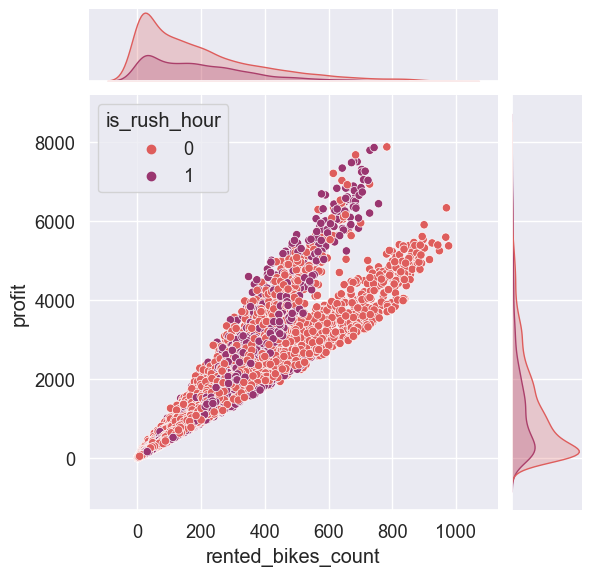

In [27]:
sns.jointplot(x='rented_bikes_count', y='profit', data=data, kind='scatter', height=6, hue='is_rush_hour', palette='flare')

<Axes: xlabel='hour', ylabel='profit'>

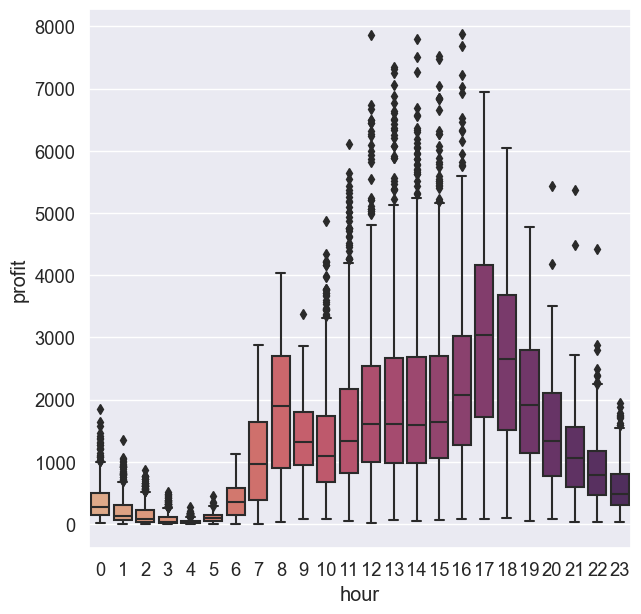

In [28]:
sns.boxplot(x='hour', y='profit', data=data, palette='flare')

# 7) Machine learning

In [36]:
data

,season,holiday,workingday,weather,temp,humidity,casual,registered,rented_bikes_count,profit,week_day_name,hour,month,is_rush_hour
0,Spring,0.0,0.0,Clear,9.84,81.0,3,13,16.0,107.328767,Saturday,0,1,0
1,Spring,0.0,0.0,NaN,9.02,80.0,8,32,40.0,275.028767,Saturday,1,1,0
2,Spring,0.0,0.0,Clear,9.02,NaN,5,27,32.0,201.928767,Saturday,2,1,0
3,Spring,0.0,0.0,Clear,9.84,75.0,3,10,13.0,94.428767,Saturday,3,1,0
4,NaN,0.0,0.0,Clear,NaN,75.0,0,1,1.0,4.128767,Saturday,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,Winter,0.0,1.0,Clear,15.58,50.0,7,329,336.0,1534.928767,Wednesday,19,12,0
10882,Winter,0.0,1.0,NaN,14.76,NaN,10,231,241.0,1165.128767,Wednesday,20,12,0
10883,NaN,0.0,1.0,Clear,13.94,61.0,4,164,168.0,773.828767,Wednesday,21,12,0
10884,Winter,NaN,1.0,Clear,13.94,NaN,12,117,129.0,709.328767,Wednesday,22,12,0


In [40]:
data.isna().sum()

season                 214
holiday                856
workingday            1498
weather               2140
temp                  2782
humidity              3424
casual                   0
registered               0
rented_bikes_count     300
profit                   0
week_day_name            0
hour                     0
month                    0
is_rush_hour             0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer, KNNImputer

In [38]:
imputer = KNNImputer()
columns=['holiday', 'workingday', 'temp', 'humidity', 'rented_bikes_count']

In [48]:
for col in columns:
    data[col]= imputer.fit_transform(data[[col]])
# data['holiday'] = imputer.fit_transform(data[['holiday']])
# data['workingday'] = imputer.fit_transform(data[['workingday']])
# data['temp'] = imputer.fit_transform(data[['temp']])
# data['humidity'] = imputer.fit_transform(data[['humidity']])
# data['rented_bikes_count'] = imputer.fit_transform(data[['rented_bikes_count']])

In [46]:
data

,season,holiday,workingday,weather,temp,humidity,casual,registered,rented_bikes_count,profit,week_day_name,hour,month,is_rush_hour
0,Spring,0.000000,0.0,Clear,9.840000,81.000000,3,13,16.0,107.328767,Saturday,0,1,0
1,Spring,0.000000,0.0,NaN,9.020000,80.000000,8,32,40.0,275.028767,Saturday,1,1,0
2,Spring,0.000000,0.0,Clear,9.020000,61.790673,5,27,32.0,201.928767,Saturday,2,1,0
3,Spring,0.000000,0.0,Clear,9.840000,75.000000,3,10,13.0,94.428767,Saturday,3,1,0
4,NaN,0.000000,0.0,Clear,20.317665,75.000000,0,1,1.0,4.128767,Saturday,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,Winter,0.000000,1.0,Clear,15.580000,50.000000,7,329,336.0,1534.928767,Wednesday,19,12,0
10882,Winter,0.000000,1.0,NaN,14.760000,61.790673,10,231,241.0,1165.128767,Wednesday,20,12,0
10883,NaN,0.000000,1.0,Clear,13.940000,61.000000,4,164,168.0,773.828767,Wednesday,21,12,0
10884,Winter,0.029113,1.0,Clear,13.940000,61.790673,12,117,129.0,709.328767,Wednesday,22,12,0


In [49]:
data.isna().sum()

season                 214
holiday                  0
workingday               0
weather               2140
temp                     0
humidity                 0
casual                   0
registered               0
rented_bikes_count       0
profit                   0
week_day_name            0
hour                     0
month                    0
is_rush_hour             0
dtype: int64

In [50]:
#imputer = SimpleImputer(strategy='most_frequent')

In [54]:
# data['season'] = imputer.fit_transform(data[['season']])
# data['weather '] = imputer.fit_transform(data[['weather ']])

In [56]:
data = pd.get_dummies(data, columns=['season', 'weather', 'week_day_name'], drop_first=True)
data

,holiday,workingday,temp,humidity,casual,registered,rented_bikes_count,profit,hour,month,...,season_Winter,weather_Mist,weather_Rainy,weather_Snowy,week_day_name_Monday,week_day_name_Saturday,week_day_name_Sunday,week_day_name_Thursday,week_day_name_Tuesday,week_day_name_Wednesday
0,0.000000,0.0,9.840000,81.000000,3,13,16.0,107.328767,0,1,...,False,False,False,False,False,True,False,False,False,False
1,0.000000,0.0,9.020000,80.000000,8,32,40.0,275.028767,1,1,...,False,False,False,False,False,True,False,False,False,False
2,0.000000,0.0,9.020000,61.790673,5,27,32.0,201.928767,2,1,...,False,False,False,False,False,True,False,False,False,False
3,0.000000,0.0,9.840000,75.000000,3,10,13.0,94.428767,3,1,...,False,False,False,False,False,True,False,False,False,False
4,0.000000,0.0,20.317665,75.000000,0,1,1.0,4.128767,4,1,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0.000000,1.0,15.580000,50.000000,7,329,336.0,1534.928767,19,12,...,True,False,False,False,False,False,False,False,False,True
10882,0.000000,1.0,14.760000,61.790673,10,231,241.0,1165.128767,20,12,...,True,False,False,False,False,False,False,False,False,True
10883,0.000000,1.0,13.940000,61.000000,4,164,168.0,773.828767,21,12,...,False,False,False,False,False,False,False,False,False,True
10884,0.029113,1.0,13.940000,61.790673,12,117,129.0,709.328767,22,12,...,True,False,False,False,False,False,False,False,False,True


In [60]:
data.drop(['casual', 'registered'], axis=1, inplace=True)
data

,holiday,workingday,temp,humidity,rented_bikes_count,profit,hour,month,is_rush_hour,season_Spring,...,season_Winter,weather_Mist,weather_Rainy,weather_Snowy,week_day_name_Monday,week_day_name_Saturday,week_day_name_Sunday,week_day_name_Thursday,week_day_name_Tuesday,week_day_name_Wednesday
0,0.000000,0.0,9.840000,81.000000,16.0,107.328767,0,1,0,True,...,False,False,False,False,False,True,False,False,False,False
1,0.000000,0.0,9.020000,80.000000,40.0,275.028767,1,1,0,True,...,False,False,False,False,False,True,False,False,False,False
2,0.000000,0.0,9.020000,61.790673,32.0,201.928767,2,1,0,True,...,False,False,False,False,False,True,False,False,False,False
3,0.000000,0.0,9.840000,75.000000,13.0,94.428767,3,1,0,True,...,False,False,False,False,False,True,False,False,False,False
4,0.000000,0.0,20.317665,75.000000,1.0,4.128767,4,1,0,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0.000000,1.0,15.580000,50.000000,336.0,1534.928767,19,12,0,False,...,True,False,False,False,False,False,False,False,False,True
10882,0.000000,1.0,14.760000,61.790673,241.0,1165.128767,20,12,0,False,...,True,False,False,False,False,False,False,False,False,True
10883,0.000000,1.0,13.940000,61.000000,168.0,773.828767,21,12,0,False,...,False,False,False,False,False,False,False,False,False,True
10884,0.029113,1.0,13.940000,61.790673,129.0,709.328767,22,12,0,False,...,True,False,False,False,False,False,False,False,False,True


In [61]:
x = data.drop('rented_bikes_count', axis=1)
y = data['rented_bikes_count']

In [62]:
x

,holiday,workingday,temp,humidity,profit,hour,month,is_rush_hour,season_Spring,season_Summer,season_Winter,weather_Mist,weather_Rainy,weather_Snowy,week_day_name_Monday,week_day_name_Saturday,week_day_name_Sunday,week_day_name_Thursday,week_day_name_Tuesday,week_day_name_Wednesday
0,0.000000,0.0,9.840000,81.000000,107.328767,0,1,0,True,False,False,False,False,False,False,True,False,False,False,False
1,0.000000,0.0,9.020000,80.000000,275.028767,1,1,0,True,False,False,False,False,False,False,True,False,False,False,False
2,0.000000,0.0,9.020000,61.790673,201.928767,2,1,0,True,False,False,False,False,False,False,True,False,False,False,False
3,0.000000,0.0,9.840000,75.000000,94.428767,3,1,0,True,False,False,False,False,False,False,True,False,False,False,False
4,0.000000,0.0,20.317665,75.000000,4.128767,4,1,0,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0.000000,1.0,15.580000,50.000000,1534.928767,19,12,0,False,False,True,False,False,False,False,False,False,False,False,True
10882,0.000000,1.0,14.760000,61.790673,1165.128767,20,12,0,False,False,True,False,False,False,False,False,False,False,False,True
10883,0.000000,1.0,13.940000,61.000000,773.828767,21,12,0,False,False,False,False,False,False,False,False,False,False,False,True
10884,0.029113,1.0,13.940000,61.790673,709.328767,22,12,0,False,False,True,False,False,False,False,False,False,False,False,True


In [63]:
y

0         16.0
1         40.0
2         32.0
3         13.0
4          1.0
         ...  
10881    336.0
10882    241.0
10883    168.0
10884    129.0
10885     88.0
Name: rented_bikes_count, Length: 10886, dtype: float64

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
scaler= StandardScaler()

scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [71]:
models = {
    "LR": LinearRegression(),
    "KNNR" : KNeighborsRegressor(), 
    "SVR": SVR(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor(),
    "XGBR": XGBRegressor()
}

In [72]:
from sklearn.metrics import mean_squared_error

In [73]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    print(f'Test Score: {model.score(x_test, y_test)}')  
    print(f'RMSE: {np.sqrt(mean_squared_error(y_test, model.predict(x_test)))}')
    print('-'*30)

Using model: LR
Training Score: 0.7260643874515866
Test Score: 0.6956356070054439
RMSE: 84.88690366414802
------------------------------
Using model: KNNR
Training Score: 0.8559078957266936
Test Score: 0.7705901613745608
RMSE: 73.69699678441023
------------------------------
Using model: SVR
Training Score: 0.6227729897383176
Test Score: 0.6174886848667731
RMSE: 95.16251559063001
------------------------------
Using model: DT
Training Score: 0.9999999131370615
Test Score: 0.8997546950035031
RMSE: 48.71646771820015
------------------------------
Using model: RF
Training Score: 0.9921730820073759
Test Score: 0.9550694005022498
RMSE: 32.61481183606383
------------------------------
Using model: XGBR
Training Score: 0.9941591412001802
Test Score: 0.9555099501923517
RMSE: 32.45452196445059
------------------------------


In [74]:
model = XGBRegressor() #less RMSE

model.fit(x_train, y_train) 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [75]:
y_pred = model.predict(x_test)
y_pred

array([188.32901 , 202.84595 , 532.3581  , ...,   6.332249,  17.436127,
       217.71255 ], dtype=float32)

In [76]:
y_test

4388    178.000000
8962    175.717079
8289    560.000000
6770    331.000000
5349     75.000000
           ...    
1664     47.000000
8810    260.000000
882       2.000000
1694     32.000000
9840    223.000000
Name: rented_bikes_count, Length: 2178, dtype: float64

In [81]:
y_test-y_pred

4388   -10.329010
8962   -27.128868
8289    27.641907
6770   -36.025543
5349    -0.125443
          ...    
1664     5.420345
8810    -1.533386
882     -4.332249
1694    14.563873
9840     5.287445
Name: rented_bikes_count, Length: 2178, dtype: float64

In [82]:
import joblib

In [83]:
joblib.dump(model, 'model.h5')

['model.h5']

In [84]:
joblib.dump(scaler, 'scaler.h5')

['scaler.h5']

In [85]:
x.columns

Index(['holiday', 'workingday', 'temp', 'humidity', 'profit', 'hour', 'month',
       'is_rush_hour', 'season_Spring', 'season_Summer', 'season_Winter',
       'weather_Mist', 'weather_Rainy', 'weather_Snowy',
       'week_day_name_Monday', 'week_day_name_Saturday',
       'week_day_name_Sunday', 'week_day_name_Thursday',
       'week_day_name_Tuesday', 'week_day_name_Wednesday'],
      dtype='object')